# Setup and Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import datetime

sns.set_theme()

In [5]:
# Load dataset
df = pd.read_csv('BrentOilPrices.csv')  
df.head()

# Convert date format
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True, errors='coerce')
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)
df = df[df['Price'].notna()]
df.head()


,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


# Exploratory Data Analysis (EDA)

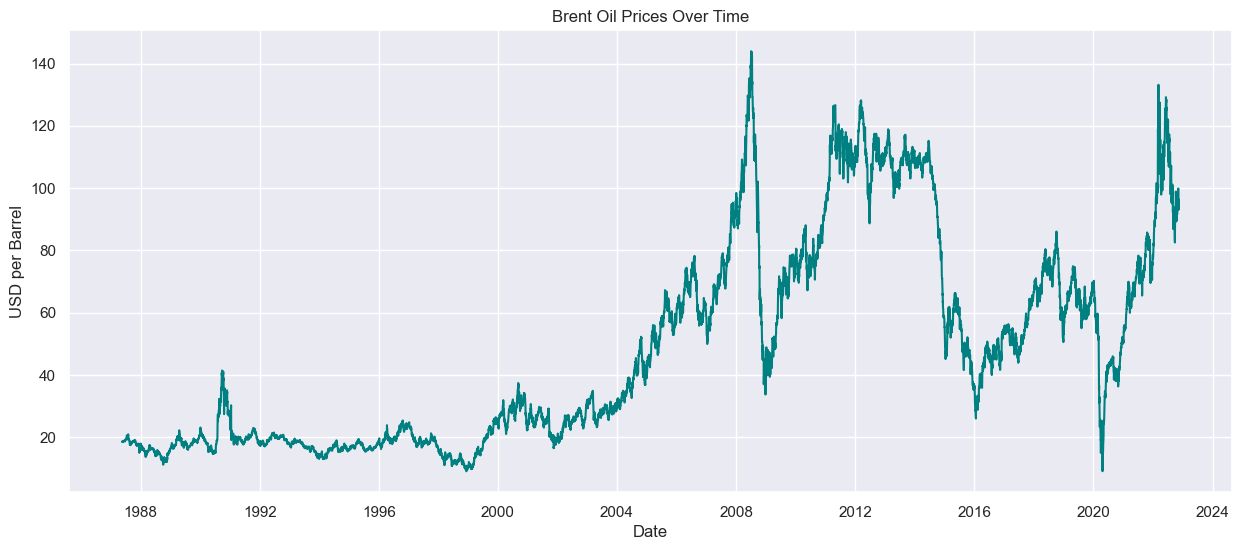

count    9011.000000
mean       48.420782
std        32.860110
min         9.100000
25%        19.050000
50%        38.570000
75%        70.090000
max       143.950000
Name: Price, dtype: float64

In [6]:
# Plot the price over time
plt.figure(figsize=(15,6))
plt.plot(df.index, df['Price'], color='teal')
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('USD per Barrel')
plt.grid(True)
plt.show()
# Summary statistics
df['Price'].describe()


# Stationarity Check

In [7]:
result = adfuller(df['Price'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")


ADF Statistic: -1.9938560113924675
p-value: 0.28927350489340287
Critical Values:
   1%: -3.4310783342658615
   5%: -2.861861876398633
   10%: -2.566941329781918


# key Event Dataset Integration

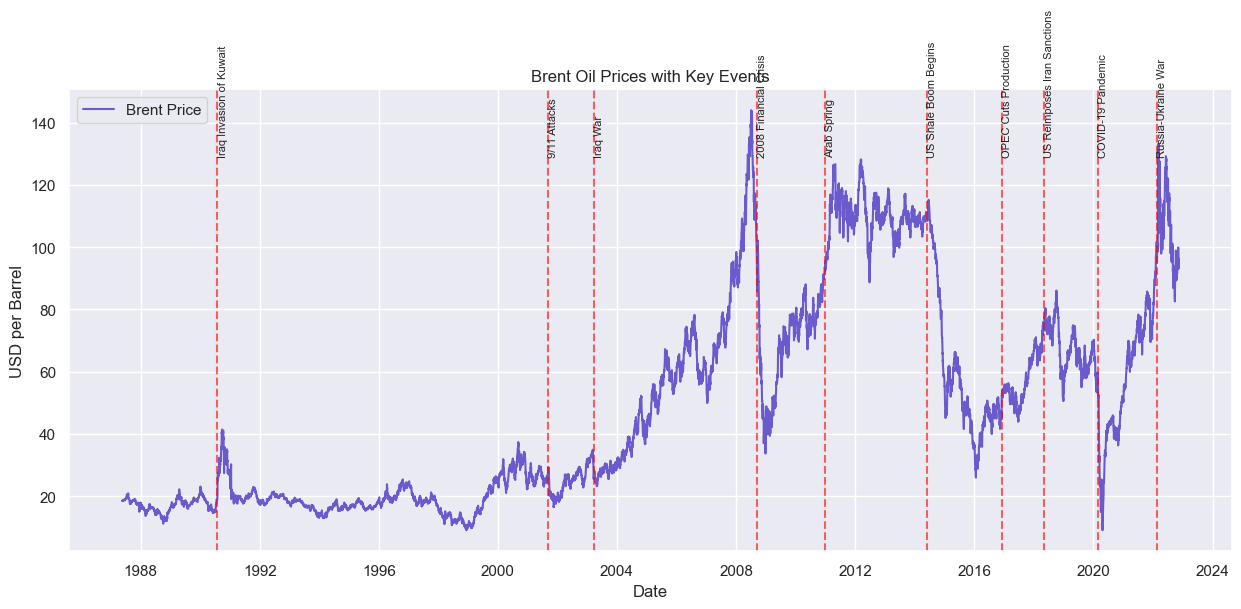

In [ ]:
# Load your compiled event data
events_df = pd.read_csv('key_events.csv')  
events_df['Start Date'] = pd.to_datetime(events_df['Start Date'])
events_df.head()
# Overlay events on the price plot
plt.figure(figsize=(15,6))
plt.plot(df.index, df['Price'], label='Brent Price', color='slateblue')

for _, row in events_df.iterrows():
    plt.axvline(row['Start Date'], color='red', linestyle='--', alpha=0.6)
    plt.text(row['Start Date'], df['Price'].max()*0.9, row['Event Name'], rotation=90, fontsize=8)

plt.title('Brent Oil Prices with Key Events')
plt.ylabel('USD per Barrel')
plt.xlabel('Date')
plt.legend()
plt.show()
